# Predictive Maintenance for Li-ion Batteries Using Time Series Data

**Authors**: Jayden Li (Junyi) and Zheng Fang

---

## 1. Abstract

Lithium-ion batteries are critical to modern technologies such as electric vehicles, consumer electronics, and aerospace systems. However, their performance degrades with repeated cycling, leading to capacity fade and potential failures. Traditional maintenance strategies, which rely on reactive or scheduled replacements, are inefficient and costly. This project focuses on developing predictive maintenance models using the NASA Prognostics Center of Excellence (PCoE) Li-ion Battery Data Set, which contains detailed charge, discharge, and impedance measurements for four batteries (B0025–B0028). By applying descriptive, predictive, and prescriptive analytics to these time series signals, we aim to estimate battery health and Remaining Useful Life (RUL), thereby enabling proactive, cost-effective, and safe maintenance decisions.




## 2. Project Description  

### Problem Definition  

The central problem we address is the inefficiency of current battery maintenance strategies. Reactive replacement of batteries often results in unplanned downtime, higher costs, and increased safety risks. Preventive replacement, by contrast, tends to discard batteries before they are fully utilized, leading to significant waste. The gap between these approaches and the desired future state lies in the lack of accurate, data-driven predictions of battery health and remaining useful life (RUL).  

Existing methods for battery maintenance can have RUL estimation errors of up to 30%, which frequently causes premature replacement and up to 20% wasted usable capacity, or late replacement that may lead to unexpected failures. Our goal is to reduce this error margin to within 10%, providing more reliable predictions and enabling proactive decisions that maximize battery usage while minimizing risk.  

---

### Decision Objectives  

The decision objectives of this project are threefold:  
1. **Predict Remaining Useful Life (RUL):** Forecast the number of cycles a battery can safely operate under realistic conditions.  
2. **Detect abnormal degradation patterns:** Identify anomalies in voltage, current, temperature, or impedance profiles that may indicate accelerated aging or imminent failure.  
3. **Provide actionable recommendations for maintenance scheduling:** Ensure batteries are replaced or serviced at the optimal time—neither too early nor too late.  

These objectives directly support organizational and societal goals. For example, in electric vehicles, better RUL prediction reduces costly pack replacements, while in aerospace, it improves mission safety by minimizing the risk of sudden battery failure.  

---

### Business and Academic Value  

From a **business perspective**, predictive maintenance enables organizations to:  
- Reduce maintenance costs by extending the usable life of batteries.  
- Minimize unplanned downtime, which can cost manufacturers hundreds of thousands of dollars per hour.  
- Enhance safety by proactively preventing failures.  
- Support sustainability by reducing premature disposal of batteries.  

From an **academic perspective**, this project contributes to the growing field of prognostics and health management (PHM). By applying machine learning to electrochemical systems, we advance methodologies for time-series analysis, anomaly detection, and sequence modeling. The project also provides a benchmark for evaluating models such as LSTMs, GRUs, CNNs, and Transformers in the context of battery RUL forecasting.  

---

### Data Elements and Models  

We will use the NASA Prognostics Center of Excellence (PCoE) Li-ion Battery Data Set. This dataset contains four batteries (B0025–B0028) tested at 24 °C under three types of operational cycles:  

- **Charge (CC-CV profile):** Constant current of 1.5 A until 4.2 V, followed by constant voltage until current drops to 20 mA.  
- **Discharge (Square-wave loading):** 0.05 Hz profile with 4 A amplitude until the voltage reaches specific cut-off levels (2.0–2.7 V depending on battery ID).  
- **Impedance (EIS):** Frequency sweeps from 0.1 Hz to 5 kHz, capturing Re (electrolyte resistance) and Rct (charge transfer resistance).  

Each dataset file contains multiple **cycles**, with metadata (operation type, ambient temperature, time) and a detailed `data` structure that includes:  
- Voltage_measured  
- Current_measured  
- Temperature_measured  
- Charge_capacity / Discharge_capacity  
- Impedance measurements (Re, Rct, total impedance)  

These variables capture the degradation process from different angles. Voltage and current reflect immediate behavior, capacity tracks long-term fade, and impedance parameters provide insights into internal electrochemical resistance growth.  

---

### Analytics Framework  

Our approach combines three layers of analytics:  

- **Descriptive Analytics:** Explore and visualize battery behavior over time, including voltage curves, temperature profiles, capacity fade across cycles, and impedance growth. Example analyses include plotting discharge capacity versus cycle number and observing degradation trends.  

- **Predictive Analytics:** Build machine learning models to forecast RUL and detect anomalies. Candidate models include Long Short-Term Memory (LSTM) networks, Gated Recurrent Units (GRUs), Convolutional Neural Networks (CNNs), and Transformers. Model performance will be evaluated using metrics such as RMSE, MAE, R^2, and classification metrics (Precision, Recall, F1-score, ROC-AUC) for anomaly detection.  

- **Prescriptive Analytics:** Translate predictions into actionable maintenance recommendations. For example, if a model forecasts that RUL is less than 10 cycles, maintenance actions such as planned replacement can be scheduled in advance. This ensures batteries are used to their full capacity while avoiding catastrophic failures.  

---

By combining descriptive, predictive, and prescriptive analytics, this framework allows us to move from fixed-schedule maintenance to intelligent predictive maintenance. The expected outcome is improved reliability, reduced costs, enhanced safety, and meaningful contributions to both industry practice and academic research in battery prognostics.  

**Next, we will take a closer look at the dataset through code exploration, in order to illustrate its structure and the key variables available for modeling.**


In [6]:
import scipy.io
import os

data_path = "5. Battery Data Set/1. BatteryAgingARC-FY08Q4/"
file_name = "B0005.mat"

mat = scipy.io.loadmat(os.path.join(data_path, file_name), squeeze_me=True)

# main data
battery = mat["B0005"]

# Find data type
print("Battery struct fields:", battery.dtype.names)

# cycle is an object
cycles = battery["cycle"].item()
print("Type of cycles:", type(cycles))
print("Number of cycles:", len(cycles))




Battery struct fields: ('cycle',)
Type of cycles: <class 'numpy.ndarray'>
Number of cycles: 616


In [8]:
first_cycle = cycles[0]
print("First cycle fields:", first_cycle.dtype.names)


print("Cycle type:", first_cycle["type"])


print("Ambient temperature:", first_cycle["ambient_temperature"])


print("Data fields:", first_cycle["data"].dtype.names)




First cycle fields: ('type', 'ambient_temperature', 'time', 'data')
Cycle type: charge
Ambient temperature: 24
Data fields: ('Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_charge', 'Voltage_charge', 'Time')


In [ ]:
# Voltage_measured
voltage = first_cycle["data"]["Voltage_measured"].item()

print("Type of voltage:", type(voltage))
print("Length of voltage:", len(voltage))
print("First 10 voltage points:", voltage[:10])


Type of voltage: <class 'numpy.ndarray'>
Length of voltage: 789
First 10 voltage points: [3.87301722 3.47939356 4.00058782 4.01239519 4.01970806 4.02540947
 4.03063627 4.03534896 4.03971637 4.04354121]


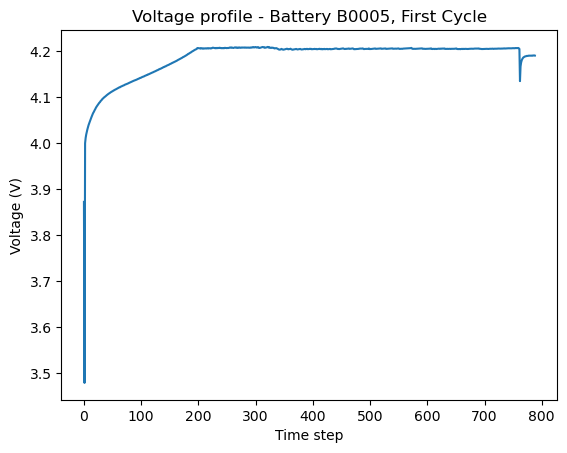

In [13]:
import matplotlib.pyplot as plt

plt.plot(voltage)
plt.title("Voltage profile - Battery B0005, First Cycle")
plt.xlabel("Time step")
plt.ylabel("Voltage (V)")
plt.show()

### 3. Data Exploration  

To better understand the dataset, we began with exploratory analysis of individual battery cycles. The plot above shows the voltage profile of **Battery B0005** during its first charge cycle.  

As shown in the figure, the voltage increases in a typical **constant-current, constant-voltage (CC-CV)** charging pattern. The voltage rises rapidly at the beginning, then gradually flattens and stabilizes near 4.2 V. This profile confirms that the dataset captures realistic charging dynamics and can be used to analyze battery health degradation over multiple cycles.  

This type of visualization represents the **Descriptive Analytics** layer of our framework, where we focus on identifying trends and patterns in raw data before moving toward predictive modeling.


Another important aspect of battery health is the capacity fade across discharge cycles. The following plot shows the discharge capacity of Battery B0005 as a function of cycle number. 

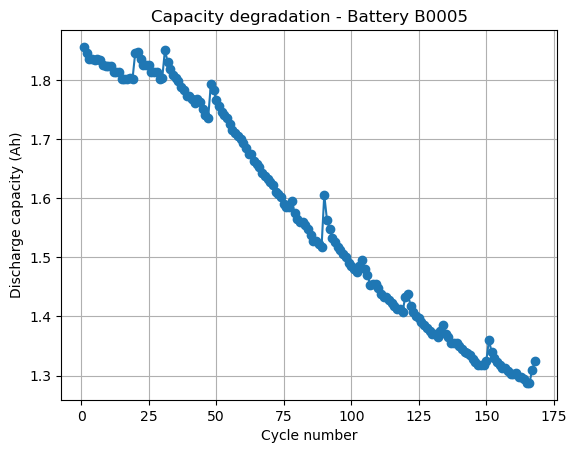

In [ ]:
# extract cycle and capacity
discharge_cycles = [c for c in cycles if c["type"][0] == "d"]
cycle_nums = list(range(1, len(discharge_cycles) + 1))
capacities = [c["data"]["Capacity"].item() for c in discharge_cycles]

# plot
plt.figure()
plt.plot(cycle_nums, capacities, marker="o", linestyle="-")
plt.xlabel("Cycle number")
plt.ylabel("Discharge capacity (Ah)")
plt.title("Capacity degradation - Battery B0005")
plt.grid(True)
plt.show()


**We observe a clear downward trend in discharge capacity across cycles, with Battery B0005 losing nearly 30% of its usable capacity within 170 cycles. This degradation curve provides a baseline signal for RUL prediction and demonstrates the importance of predictive maintenance in battery systems**

### 4. Planned Predictive Approach (Predictive Analytics)

To move beyond descriptive insights, we plan to develop predictive models that forecast the **Remaining Useful Life (RUL)** of Li-ion batteries and detect early signs of abnormal degradation. Since our dataset contains rich **time-series measurements** (voltage, current, temperature, impedance), we will adopt a sequence modeling approach leveraging state-of-the-art machine learning methods.

**Proposed Models:**
1. **LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit):**  
   These recurrent neural network architectures are well-suited for time-series data. They can capture temporal dependencies and long-term degradation patterns, making them strong candidates for predicting RUL and cycle-to-cycle behavior.

2. **Transformers (Attention-based Models):**  
   Recent advances in sequence modeling have shown that attention mechanisms can outperform RNNs by focusing on the most critical parts of the sequence. Transformers are expected to capture both short- and long-range dependencies in battery degradation data, potentially improving forecasting accuracy.

**Evaluation Metrics:**  
We will evaluate our models using both regression metrics for RUL prediction and classification metrics for anomaly/failure detection. Specifically:  
- **RMSE (Root Mean Square Error):** Measures accuracy of RUL predictions, penalizing larger errors.  
- **MAE (Mean Absolute Error):** Provides interpretable average error magnitude.  
- **Precision, Recall, and F1-score:** For classification of degradation anomalies (to balance false alarms and missed detections).  
- **ROC-AUC:** To evaluate the trade-off between true positive rate and false positive rate in anomaly detection tasks.  

This predictive layer will enable us to quantify future battery health with confidence, forming the foundation for prescriptive analytics and actionable maintenance recommendations.


### 5. Prescriptive Angle (Actionable Maintenance)

The final layer of our framework focuses on translating predictive results into actionable decisions that directly improve battery reliability and safety. While descriptive analytics provides insights into historical degradation and predictive analytics forecasts future health, prescriptive analytics determines "how to act" based on these predictions.

**Decision Rules:**
1. **Remaining Useful Life (RUL) threshold:**  
   If the predicted RUL falls below **10 cycles**, the system will trigger a recommendation to replace the battery before complete failure occurs. This minimizes the risk of unexpected downtime and ensures the system continues operating safely.

2. **Impedance growth threshold:**  
   If impedance values (Re, Rct) exceed a defined safety margin, the system will issue a **maintenance alert**. High impedance indicates internal degradation, which can lead to overheating or unsafe operating conditions.

**Impact:**  
By combining predictive forecasts with rule-based prescriptions, this framework enables organizations to:  
- Reduce unplanned downtime by proactively replacing batteries.  
- Extend operational safety margins through early detection of abnormal impedance growth.  
- Optimize maintenance schedules, avoiding both premature replacement and catastrophic failure.  

This prescriptive layer completes the analytics pipeline by turning predictions into actionable maintenance strategies, closing the loop from data to decision-making.


### 6. Bibliography

1. Saha, B., & Goebel, K. (2007). **Battery Data Set**. NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA.  
   [Download Link](https://phm-datasets.s3.amazonaws.com/NASA/5.+Battery+Data+Set.zip)

2. Goebel, K., Saha, B., Saxena, A., Celaya, J., & Christophersen, J. (2008). **Prognostics in battery health management**. *IEEE Instrumentation & Measurement Magazine*, 11(4), 33–40.  
   https://doi.org/10.1109/MIM.2008.4579269

3. Berecibar, M., Devriendt, F., Dubarry, M., Villarreal, I., Omar, N., Mierlo, J. V., & Bossche, P. V. (2016). **State of health estimation in lithium-ion batteries: A review**. *Renewable and Sustainable Energy Reviews*, 56, 572–587.  
   https://doi.org/10.1016/j.rser.2015.11.042

